# Maths - Form & Function: Chapter 8 (Forms of Space)

---

## 1. Curvature

> In Euclidean and Non-Euclidean geometry, the phenomena of space were analysed in terms of lines, triangles, angles, and congruence; in brief, such a geometry is primarily linear.  Many other geometrical phenomena, however, involve curved lines in the plane and twisted curves and curved surfaces in three-dimensional space. By approximating these curves by straight lines, the methods of calculus come into play, leading to the subject of differential geometry ...

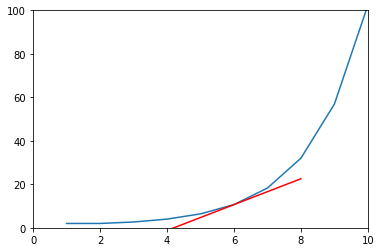

In [1]:
import matplotlib.pyplot as plt

# A smooth path (paramaterized curve) in x, y plane given by 2 functions

# Function for x
def g(t):
    x = t
    return x

# Function for y
def h(t):
    y = 2 ** t / t
    return y

# obtaining the curve
x_s = [g(t) for t in range(1, 11)]
y_s = [h(t) for t in range(1, 11)]

# The tangent vector at time 5
tangent_vector_x = x_s[5] - (x_s[6] - x_s[4]), x_s[5] + (x_s[6] - x_s[4]) 
tangent_vector_y = y_s[5] - (y_s[6] - y_s[4]), y_s[5] + (y_s[6] - y_s[4])

plt.plot(x_s, y_s)
plt.plot(tangent_vector_x, tangent_vector_y, color = 'r')
plt.xlim(0, 10)
plt.ylim(0, 100)
plt.show()

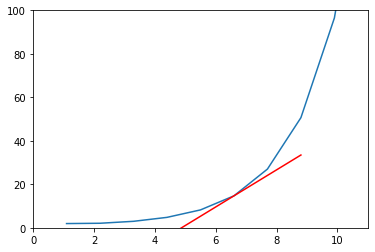

In [2]:
# time can be modified by another smooth function k
def k(t):
    u = t * 1.1
    return u

x_s = [g(k(t)) for t in range(1, 11)]
y_s = [h(k(t)) for t in range(1, 11)]

# The tangent vector at time 5
tangent_vector_x = x_s[5] - (x_s[6] - x_s[4]), x_s[5] + (x_s[6] - x_s[4]) 
tangent_vector_y = y_s[5] - (y_s[6] - y_s[4]), y_s[5] + (y_s[6] - y_s[4])

plt.plot(x_s, y_s)
plt.plot(tangent_vector_x, tangent_vector_y, color = 'r')
plt.xlim(0, 11)
plt.ylim(0, 100)
plt.show()

In [3]:
def length_of_curve(t1, t2):
    lengths = []
    t = t1
    while t != t2:
        dx = x_s[t + 1] - x_s[t]
        dy = y_s[t + 1] - y_s[t]
        lengths.append((dx**2 + dy**2)**.5)
        t += 1
    return sum([x for x in lengths])

print(length_of_curve(3, 6))

22.520524241350657


In [4]:
def k(t):
    """ Calculates the curvature. """
    numerator = (g(t-1) * h(t+1)) - (h(t-1) * g(t + 1))
    denominator = (g(t-1)**2 + h(t-1)**2) ** (3/2)
    return numerator / denominator

print(k(5))

0.10311973892303816


> ... a rotation or a translation of the curve will not alter its arc length between two points or the curvature as a function of this length. Hence these qualities are said to be Euclidean *invariants* of the curve, in the sense that they are unaltered by the stated (Euclidean) transformations.

> For curves in space there is an additional invariant, the *torsion*, which measures the rate at which the curve deviates from one lying wholly in one plane.

> It is then true that arc length, curvature, and torsion together provide a complete set of Euclidean invariants for a smooth space curve.

> In brief, the lines, circles and planes of elementary Euclidean geometry can be used to approximate the curves (and later the surfaces) in space, thereby making the ideas of the calculus apply in a geometric context.

---

## 2. Gaussian Curvatures for Surfaces

> ... using the calculus and an equation $z = f(x,y)$ ... one can determine at each point *p* of the surface *S* a plane tangent to *S* and hence a vector **n** of length 1 orthogonal to the tangent plan; this vector is called a *unit normal vector* to *S* ... [if] we choose these vectors smoothly at nearby points of the chart we get a *field* of such vectors, one attached to each point of this piece of the surface ... the curvature of the surface ought to be meassured by the way in which these unit normal vectors vary (tip about) from point to point on the surface.

There are various ways to formalize this intuition:

1. reduce the question to one dealing directly with the curvature of plane curves
2. a concept developed by Gauss, below

> On a little piece *A* of the surface about the point *p*, take *all* the unit normal vectors **n** at points of *A* and translate them so taht they all start from the origin 0. The ends of these unit vectors then trace out a region *B* on the unit sphere about the origin. Moreover, the more sharply the surface curves at *p*, the larger the region *B*.

The *Gaussian curvature*:

$$
K = \lim \frac{\text{area B (on the unit sphere)}}{\text{area A (on the surface)}}
$$

above, the limit is taken as all the dimensions of *A* approach zero.

"shape mapping" is the symmetric matrix transformation of a vector **v** into the derivative of the vector field **n** in the direction **v** ($\nabla _v\textbf{n}$)

> This shape mapping clearly contains information as to how rapidly the unit normal is turning, for motions in any direction from the point *p*. Hence it is not surprising that it can be shaown that *L* contains all the information about the curvature of the surface at the point *p*.

> ... the determinant of the shape mapping is the Gaussian curvature *K* of the surface, complete with desired sign. Like every self-adjoint transformation, this particular transformation *L* can be brought to principal axes. It turns out that these axes are exactly the principal directions of curvature ... while the eigenvalues are the principal curvatures $K_1$ and $K_2$.

---

## 3. Arc Length and Intrinsic Geometry

> On a sphere, the length of an arc of any smooth curve can be computed by an integral ... where the differentials $dx$, $dy$, and $dz$ are computed in a suitable chart directly from the expression for the curve in the coordinates of latitude $\theta$ and longitude $\phi$.

In [5]:
import math

def distance_on_sphere(radius, theta, df_theta, df_phi):
    """ Theta should be in radians. """
    lft = radius**2 * df_theta**2
    rgt = radius**2 * math.cos(theta)**2 * df_phi**2
    ds2 = lft + rgt
    ds = math.sqrt(ds2)
    return ds

print(distance_on_sphere(1, 1, 2, 3))

2.5743619084227185


> ... "intrinsic" geometry of the surface - geometric properties of figures in the surface which can be determined entirely in terms of measurements in the surface which make no reference to the ambient space - the rest of the space surrounding the surface. These properties would include quantities which could be computed just from the first fundamental form $ds^2$, because this form depends only on measurements of arc length for paths in the surface.

The Gaussian curvature of $K$ at each point $p$ can be given by the limit:

$$
K_p = \lim_{A,B,C \to p} \frac{E(ABC)}{\text{area}(\Delta ABC)}
$$

The limit is reached as the 3 vertices A, B, & C approach the point p

---

## 4. Many-Valued Functions and Riemann Surfaces

A simple example of a many-valued function is the square root; every positive number has two square roots, one positive & one negative whose absolute is equal.

> ... many-valued functions of a real variable can be made into single-valued functions, not of a number but of a point on a curve. In effect, such a curve displays (in a continuous fashion) all the values of the function as the projections on the axes *u* and *x*, with nearby values corresponding to nearby points.

> ... a general method for turning a many-valued "function" *w* of a complex variable *z* into a single-valued function not of *z* but of a point on a surface *S*, a *Riemann Surface* ...

> First decompose the *z*-plane by slits so that *w* becomes single-valued when it is followed continuously along paths constrained not to cross the slits. This yields several single valued functions $w_j$ which may be called the *branches* of *w*.

> For each such branch $w_j$, take one copy of the slit *z*-plane to carry these values $w_j$. Then paste these copies together along the slites appropriately matched so as to get the desired surface *S*.

> This is a process which visualizes the surface *S*, which is described intrinsically as the manifold of all the pairs $(w,z)$ involved.

---

## 5. Examples of Manifolds

> The sphere can be described as the "manifold" of all solutions $(x,y,z)$ of the equation $x^2 + y^2 + z^2 = 1$. In many other cases the set of all solutions of some problem or the collection of all "things" with some observable property can be regarded as a geometric entity - curve, surface, or solid - in which "nearby" solutions are pictured as "nearby" points.

> ... the torus *is* the geometric manifold of possible positions of the double pendulum; on this torus one may picture various periodic motions of the pendulum.

---

## 6. Intrinsic Surfaces and Topological Spaces

> ... the intrinsic description of a surface proceeds in several stages, each stage a formalism which describes more of the structure of the surface.

1. a surface $S$ is at least a topological space
2. a surface $S$ is two-dimensional
3. a surface $S$ should normally be smooth (allows co/tangent planes)
4. a surface may be equipped with a metric

**Hausdorff Axiom.** To each pair $p \neq q$ of distinct points of $X$ there exist disjoint open sets $U$ and $V$ in $X$ with $p \in U$ and $q \in V$.

One definition of spaces being connected:

> A space is *connected* when it is not the union of two disjoint, non-empty open sets $U$ and $V$. For example, the topological space consisting of the whole real line minus the origin is not connected, because it is the union of two (disjoint) half lines, each open - because the origin has been omitted.

Another definition of spaces being connected:

> A *path* in $X$ is a continuous map $f: I \rightarrow X$ of the unit interval $I = {t| 0 \le t \le 1}$ into the space $X$; it is of course called a *path* from $f(0)$ to $f(1)$. Then a space $X$ is said to be *path connected* (or, sometimes, "arcwise connected") when there is at least one path joining any two points of the space.

---

## 7. Manifolds

Surfaces are "two-dimensional" in the sense that each point of the surface has a neighbourhood which looks like (i.e., is homeomorphic to) a neighbourhood of some point in the Euclidean plane.

> ... a surface is a topological space obtained by pasting together open sets (more explicitly, open discs) cut from the Euclidean plane.

> ... one might take *all* the possible charts for $S$; they form an atlas called the *maximal* atlas because it contains every other atlas. Then a surface would be defined as a topological space which is covered by the domains of all of its two-dimensional charts.

> Any compact connected orientable surface is homeomorphic to the sphere or to a pretzel with $g$ holes, where the natural number $g \ge 1$ is called the *genus* of the surface. Two such surfaces of different genera cannot be homeomorphic.

> For higher dimensions, our formal definition of a surface (a two-dimensional topological manifold) carries over at once to a definition of an *n*-dimensional topological manifold; the only change is that charts are now homeomorphisms $\phi: U \rightarrow V \in \mathbb{R}^n$ into open subsets $V$ of $\mathbb{R}^n$.

> ... the full notion of a manifold requires both its global description as a topological space and its local description by charts.

---

## 8. Smooth Manifolds

> ... [a] function ... is defined to be *smooth* if both these coordinate functions $f1$ and $f2$ are smooth (have continuous partial derivatives of all orders).

3 basic properties:

1. *Composition*: The composite of 2 smooth functions is smooth.
2. *Restriction*: A smooth function remains smooth under any restriction of its domain.
3. *Patching*: A function put together from smooth pieces is smooth

> The plane, the sphere, the torus and the projective plane, with the respective atlases which we have described, are all smooth two-dimensional manifolds, with the expected smooth maps. There are similar smooth manifolds in higher dimensions. For that matter, the circle, the open interval and the whole real line are smooth one-dimensional manifolds.

---

## 9. Paths and Quantities

> The calculus for a smooth surface $S$ involves pairs of smooth maps

$$
I \xrightarrow{\text{h}} S \xrightarrow{\text{f}} \mathbf{R}
$$

> Here $I$ is an interval, say the interval $-1 < t < 1$ of $\mathbf{R}$, with $t$ as local coordinate. For suitable coordinates $x_1, x_2$ on $S$ these two functions $h$ and $f$ are expressed by formulas such as

$$
t \mapsto h(t) = (h_1(t),h_2(t)); (x_1, x_2) \mapsto f(x_1, x_2);
$$

> we may supposed that $h(0) = (0,0)$ is the origin (of local coordinates) on $S$.

In [6]:
def tangent_vector_at_origin(dh1, dh2, dt):
    """ Calculates the tangent vector at origin.
    dh1 - change over h1
    dh2 - change over h2
    dt - change over t
    """
    left = dh1 / dt
    right = dh2 / dt
    return (left, right)

print(tangent_vector_at_origin(0, 0, 1))
print(tangent_vector_at_origin(1, 2, 1))
print(tangent_vector_at_origin(2, 3, 1))
print(tangent_vector_at_origin(2, 3, .5))

(0.0, 0.0)
(1.0, 2.0)
(2.0, 3.0)
(4.0, 6.0)


In [7]:
def gradient_of_f(dx1, dx2, df):
    """ Defines the differential of quantity f
    dx1 - partial derivative of x axis
    dx2 - partial derivative of y axis
    df - partial derivative of f
    """
    left = df / dx1
    right = df / dx2
    return (left, right)

print(gradient_of_f(1, 1, 2))
print(gradient_of_f(.5, 1, 2))

(2.0, 2.0)
(4.0, 2.0)


In [8]:
def directional_derivative_f(tan, grad):
    """ The directional derivative.
    tan - the tangent vector
    grad - the gradient
    """
    t1, t2 = tan
    g1, g2 = grad
    return g1 * t1 + g2 * t2

tan = tangent_vector_at_origin(2, 3, 1)
grad = gradient_of_f(1, 1, 2)

print(tan)
print(grad)
print(directional_derivative_f(tan, grad))

(2.0, 3.0)
(2.0, 2.0)
10.0


In [9]:
tan = tangent_vector_at_origin(2, 3, 1)
grad = gradient_of_f(1, 1, 2)

print(tan)
print(grad)
print(directional_derivative_f(tan, grad))

(2.0, 3.0)
(2.0, 2.0)
10.0


> ... two quantities $f$ and $g$ have the *same* cotangent vector at this origin when they have the same directional derivatives along all paths - and dually that two paths through the origin have the same tangent vector there if and only if they give equal directional derivatives there for alll quantities.

To summarize the above:

- if two functions give the same directional deriviative, no matter how you vary the path, then they are have the same cotangent vector

- if two paths through the origin give the same directional derivatives, no matter how you vary the quantities, then they have the same tangent vector

> ... both for surfaces and for manifolds of higher dimension, the tangent and cotangent spaces arise naturally and together from the smooth structure and from the smooth paths and quantities defined by that structure.

> Each point of the surface $S$ has its cotangent space, a vector space of dimension 2. Now consider the set of all cotangent vectors at all points of $S$; they form a geometric object called the *cotangent bundle* $T\mbox{*}S$.

> ... a cross section is a smooth map which sends each point $(x_1,x_2)$ of the surface $S$ to a vector $d^{x1,x2}f$ cotangent at that point.

## 10. Riemann Metrics

> The final step in the intrinsic description of a surface $S$ is the metric, defined by specification of the lengths of curves on $S$. This will be done by integrating a formula for the differential $ds$ of arc length.

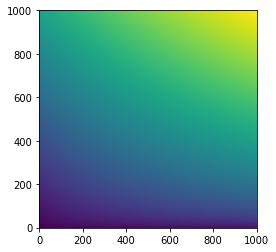

In [27]:
def riemann_metric_quadratic_differential_form(g, x_i, x_j, dx_i, dx_j):
    """
    The Riemann metric in quadratic differential form.
    
    g = a matrix of functions
    x = local coordinates
    dx = differentials
    """
    ds = 0
    for i in range(2):
        for j in range(2):
            function = g[i][j]
            ds += function(x_i, x_j) * dx_i * dx_j
    return math.sqrt(ds)

def function_1_1(x, y):
    return x**2 - (y + x)

def function_2_2(x, y):
    return x + 2 * y

def function_other(x, y):
    return x * y

g = [[function_1_1, function_other], [function_other, function_2_2]]

upper_limit = 1001
ds = [[None] * upper_limit for _ in range(upper_limit)]
for x in range(upper_limit):
    for y in range(upper_limit):
        ds[x][y] = riemann_metric_quadratic_differential_form(g, x, y, .5, 2)

plt.imshow(ds, origin = 'lower')
plt.show()

> A *Riemann metric* on a surface means a metric on each chart, such that the metrics agree (under change of coordinates) on each overlap of charts.

> ... specifying a Riemann metric on the surface $S$ amounts exactly to specifying an inner product in the tangent plane at each point of $S$, in such a way that this specification is smooth (i.e., smooth as a function of the local coordinates). This description ... apply equally well for smooth manifolds of higher dimensions. It is the starting point of an extensive theory of Riemannian manifolds.

> A surface is a topological space covered by charts with smooth overlaps and with a Riemann metric. On this basis there is a remarkable further development of geometric properties of surfaces - and similarly of higher dimensional manifolds.

---

## 11. Sheaves

A sheave is a collection of functions defined on each open subset $U$ of $X$ together with the way in which these functions restrict to smaller open subsets.

A *presheaf* $P$ on a topological space $X$ is a function which assigns a set $P(U)$ to each open set $U$ of $X$ with a restriction map $P(U)$ to $P(V)$ so that the restriction of $U$ to $U$ is always the identity and also so that restrictions compose. This of $P(U)$ as the set of all continuous or smooth functions on the open set $U$ with a restriction operation

A *sheaf* is a *presheaf* where the continuous and smooth functions match on all overlaps when pieced together.

> A manifold can be described as a topological space on which the "good" functions are specified, by giving the sheaf of such functions.

## 12. What is Geometry?

> ... geometry is not just a subdivision or a subject within Mathematics, but a means of turning visual images into formal tools for the understanding of other Mathematical phenomena.

> .. geometry is not the science of a unique form of "space", but the extended study of many space-like forms.

Types of manifold:

- topological (continuous overlaps)
- differentiable (continuous & smooth overlaps)
- complex-analytic (complex analytic overlaps)

> Geometry is not so much a subdivision of Mathematics as one source of Mathematical form.